In [28]:
import cv2
import os
import glob
import numpy as np
from albumentations import (
    PadIfNeeded, HorizontalFlip, VerticalFlip, CenterCrop, Crop, Compose, Transpose, RandomRotate90,
    ElasticTransform, GridDistortion, OpticalDistortion, RandomSizedCrop, OneOf, CLAHE, RandomBrightnessContrast,
    RandomGamma, HueSaturationValue, RGBShift, RandomBrightness, RandomContrast, MotionBlur, MedianBlur, GaussianBlur,
    GaussNoise, ChannelShuffle, CoarseDropout
)
from matplotlib import pyplot as plt

def read_data(image_path, mask_path):
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    return image, mask

def visualize_augmentation(original_image, augmented_image):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    plt.title("Augmented Image")
    
    plt.tight_layout()
    plt.show()

def augment_data(images, masks, save_path, augment=True):
    # Augmentation techniques setup
    augmentation = Compose([
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        CenterCrop(p=1, height=160, width=160),
        # Add other augmentation techniques here...
    ])

    for image_path, mask_path in zip(images, masks):
        image_name = os.path.basename(image_path).split(".")[0]
        mask_name = os.path.basename(mask_path).split(".")[0]

        image, mask = read_data(image_path, mask_path)

        if augment:
            augmented = augmentation(image=image, mask=mask)
            augmented_image = augmented["image"]
            augmented_mask = augmented["mask"]
        else:
            augmented_image = image
            augmented_mask = mask

        image_save_path = os.path.join(save_path, "augmented_images", f"{image_name}_augmented.png")
        mask_save_path = os.path.join(save_path, "augmented_masks", f"{mask_name}_augmented.png")

        cv2.imwrite(image_save_path, augmented_image)
        cv2.imwrite(mask_save_path, augmented_mask)
        
        visualize_augmentation(image, augmented_image)



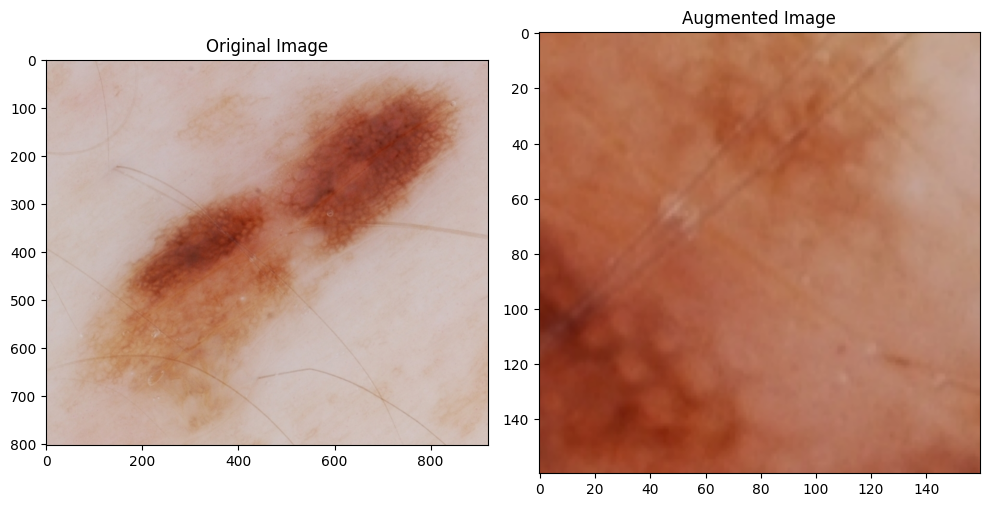

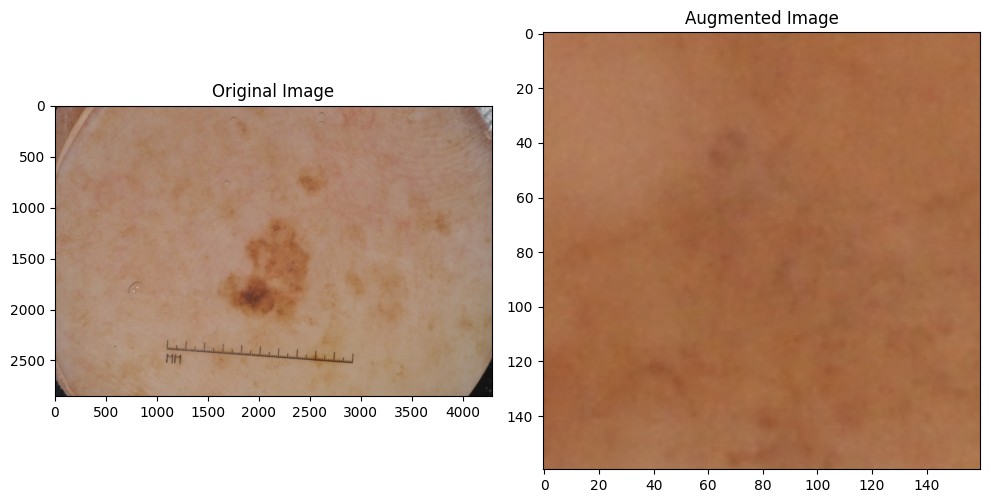

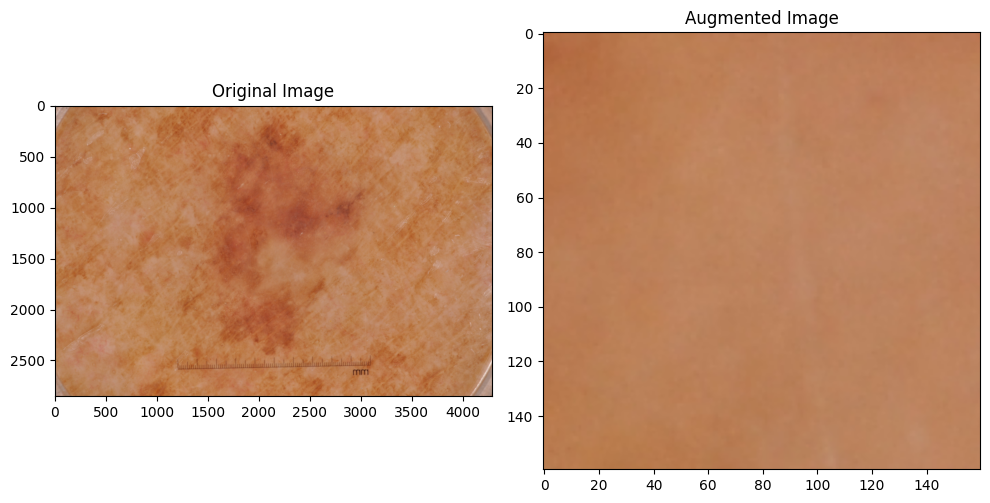

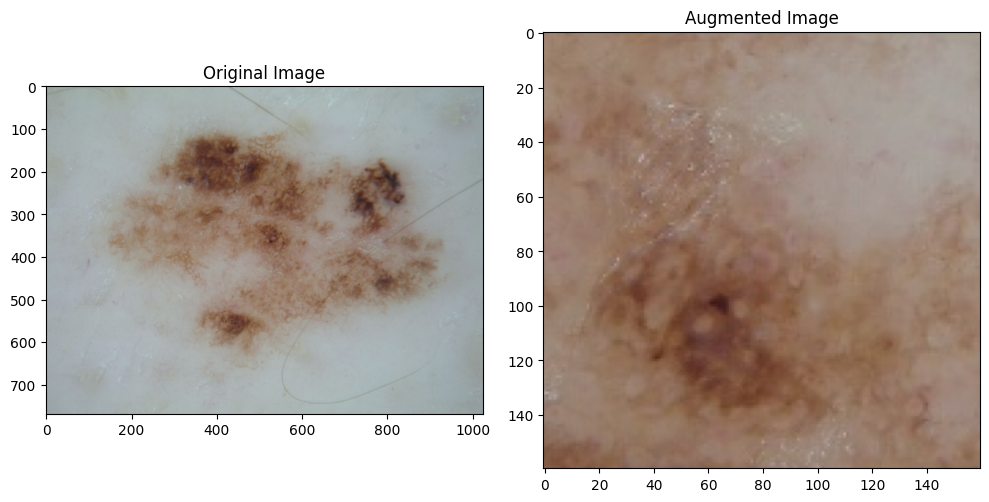

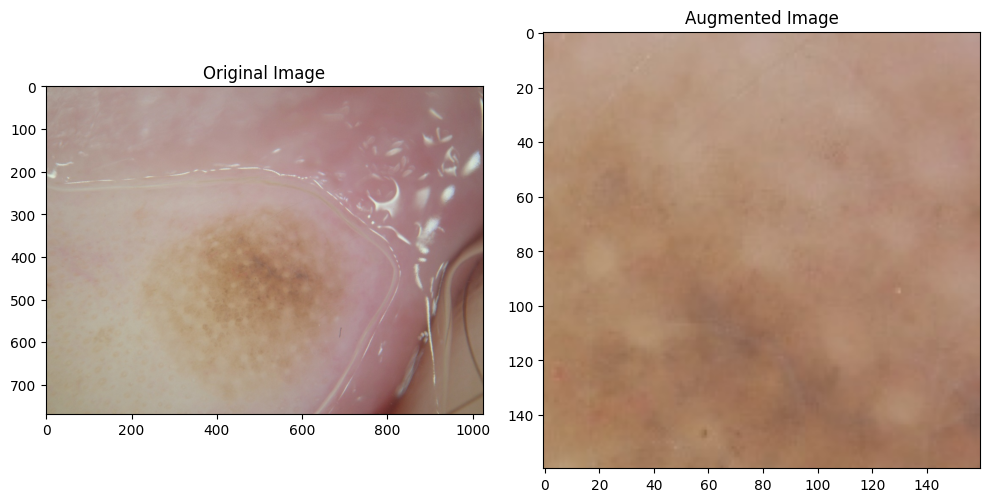

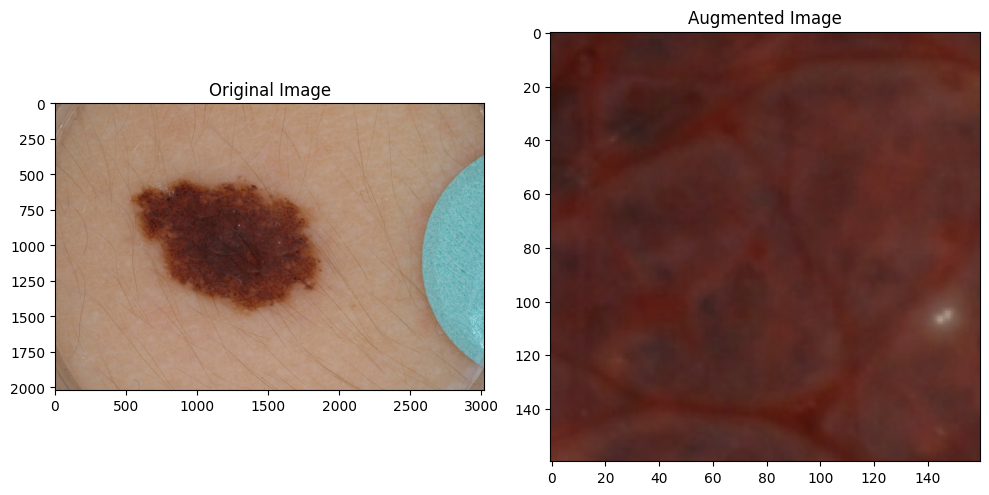

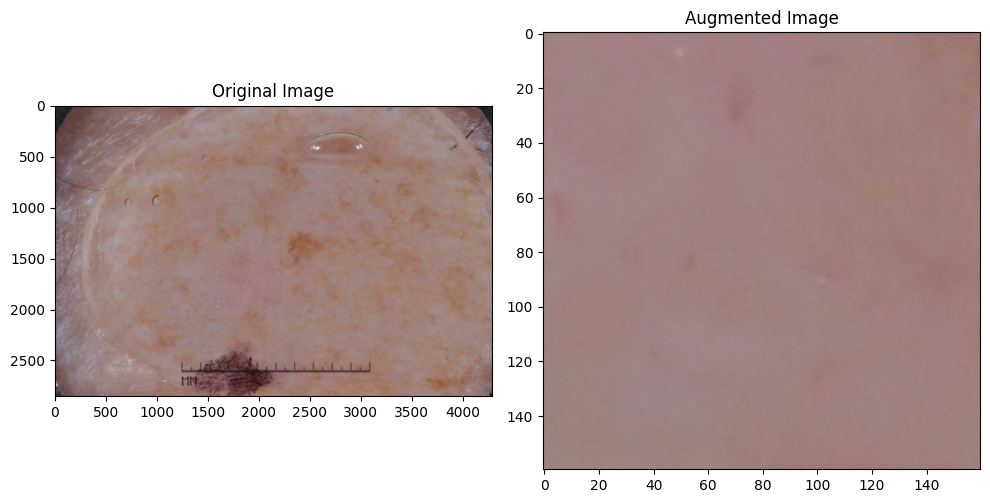

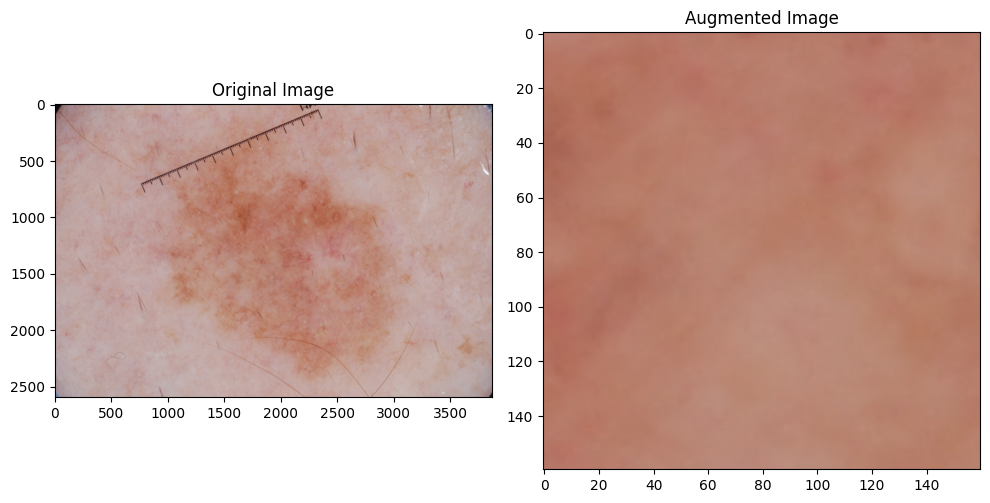

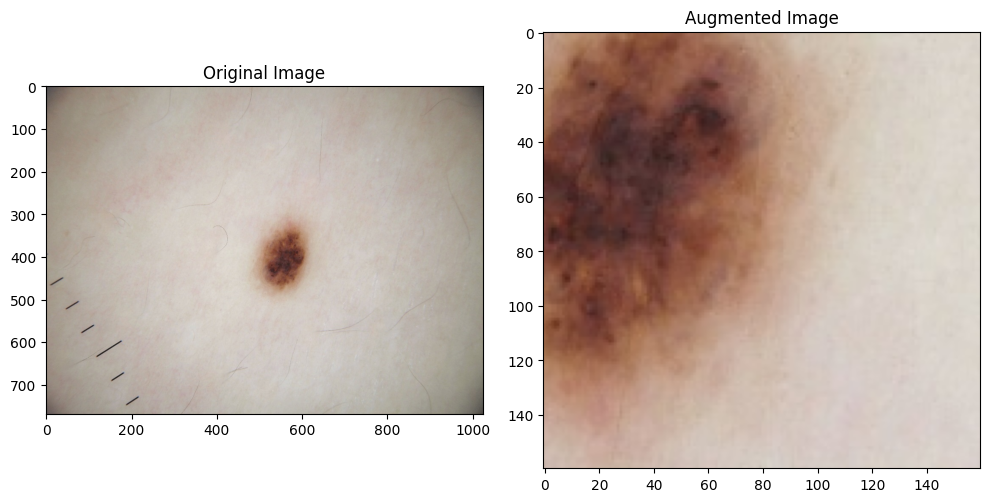

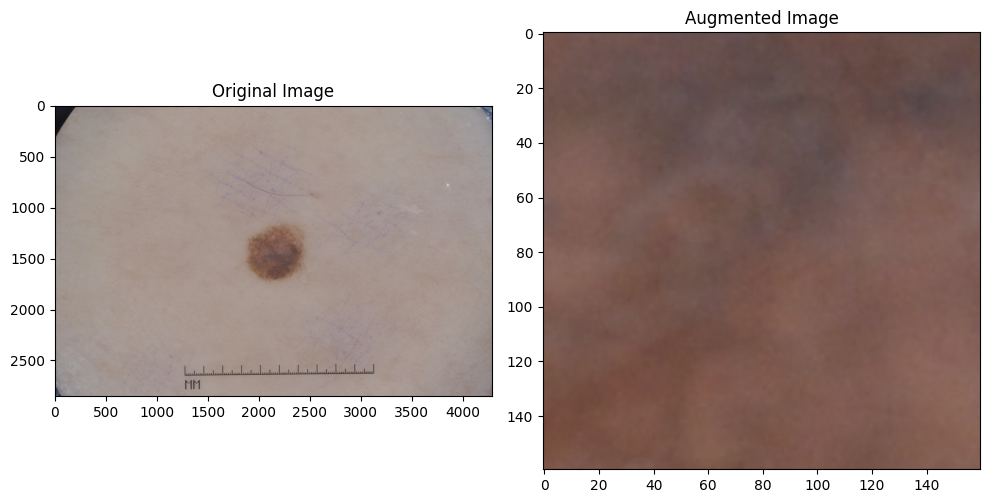

In [29]:
# Define your image and mask paths
image_paths = glob.glob("/home/somayeh/PycharmProjects/superpixel_segmentation/ISIC2018_SKIN_DATA/ISIC2018_Task1-2_Training_Input/*.png")
mask_paths = glob.glob("/home/somayeh/PycharmProjects/superpixel_segmentation/ISIC2018_SKIN_DATA/ISIC2018_Task1_Training_GroundTruth/*.png")

# Specify the save path for augmented data
save_path = "/home/somayeh/PycharmProjects/superpixel_segmentation/augmented_data"

# Ensure the save directories exist
os.makedirs(os.path.join(save_path, "augmented_images"), exist_ok=True)
os.makedirs(os.path.join(save_path, "augmented_masks"), exist_ok=True)

# Perform data augmentation and save the results
augment_data(image_paths[:10], mask_paths[:10], save_path, augment=True)